# Project 3: Air Quality

## Hye Jeong Lee (HL9563)

### May 10, 2021

#### 1. Data 

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load 
url = "https://assets.datacamp.com/production/course_2023/datasets/airquality.csv"
air = pd.read_csv(url)

In [3]:
# glimpse of air quality data
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [4]:
# information of air quality data
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


*Air quality data is New York's air quality data measured in 1973. The data consists of 153 observations and 6 variables. All variables are technically numiercal, but variables 'Month' and 'Day' does not hold valuable information as numerical value. Therefore 'Month' variable can be converted into a categorical variable. Ozone concentration is in parts per billion (ppb), solar radiation is in langleys, wind speed is in mph, and temperature is in farenheit (F).*

2. EDA

In [5]:
# Clean out the NA on ozone concentration
air = air[air['Ozone'].notna()]

# Change month to categorical variable
import calendar
air['Month'] = air['Month'].apply(lambda x:calendar.month_abbr[x])
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     116 non-null    float64
 3   Temp     116 non-null    int64  
 4   Month    116 non-null    object 
 5   Day      116 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 6.3+ KB


In [6]:
# summary statistics on numerical variables
air[['Ozone', 'Temp','Solar.R','Wind']].describe()

,Ozone,Temp,Solar.R,Wind
count,116.000000,116.000000,111.000000,116.000000
mean,42.129310,77.870690,184.801802,9.862069
std,32.987885,9.485486,91.152302,3.574856
min,1.000000,57.000000,7.000000,2.300000
25%,18.000000,71.000000,113.500000,7.400000
50%,31.500000,79.000000,207.000000,9.700000
75%,63.250000,85.000000,255.500000,11.500000
max,168.000000,97.000000,334.000000,20.700000


After dropping NAs on ozone variable, the data consists of 116 observations.
1. Ozone concentration ranges between 1 and 168 ppb. Its average is 42.13 ppb with a standard deviation of 32.99 ppb. Its median is 31.5 ppb with an interquartile range of 45.25 ppb.
2. Temperature ranges from 57 to 97 Farenheit. Its average is 77.87 F with a standard deviation of 9.49 F. Its median is 79 F with an interquartile range of 14 F.
3. Solar Radiation ranges from 7 to 334 langleys. Its average is 184.80 langleys with a standard deviation of 91.15 langleys. Its median is 207 langleys with an interquartile range of 142 langleys.
4. Wind speed ranges from 2.3 to 20.7 mph. Its average is 9.86 mph with a standard deviation of 3.57 mph. Its median is 9.7 mph with an interquartile range of 4.1 mph.

Text(0.5, 1.0, 'Histogram of Ozone Concentration (ppb)')

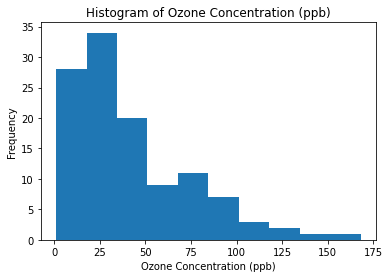

In [7]:
# EDA 
# histogram of ozone concentration
air['Ozone'].plot(kind="hist")
plt.xlabel('Ozone Concentration (ppb)')
plt.title('Histogram of Ozone Concentration (ppb)')

*Ozone concentration is right skewed, where the highest frequency is around 25 ppb.*

Text(0.5, 1.0, 'Pie chart of monthly observations')

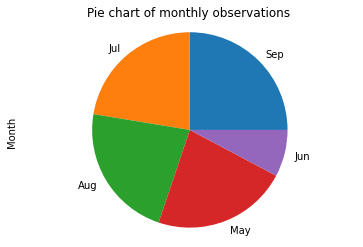

In [8]:
# pie chart
air['Month'].value_counts()\
.plot(kind = "pie")\
.axis('equal')
plt.title('Pie chart of monthly observations')

*It is clear that observations in June are siginificantly smaller compared to that of other months.* 

Text(0, 0.5, 'Ozone Concentration (ppb)')

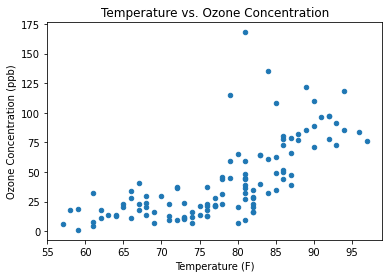

In [9]:
# scatter plot
air.plot.scatter(x='Temp',y='Ozone')
plt.title('Temperature vs. Ozone Concentration')
plt.xlabel('Temperature (F)')
plt.ylabel('Ozone Concentration (ppb)')

*It shows a positive relationship between temperature and ozone concetration.* 

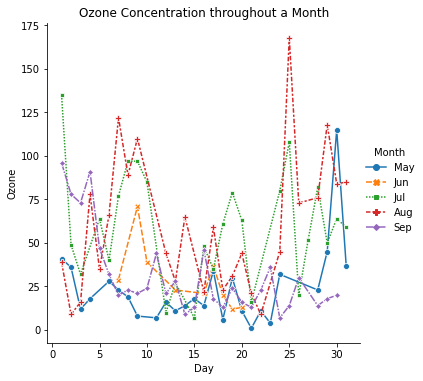

In [10]:
sns.relplot(x='Day', y='Ozone', data=air, kind='line',
            ci = None, style = "Month", hue = "Month", markers=True)
plt.title('Ozone Concentration throughout a Month')
plt.show()

*This shows variations in ozone concentration thtoughout each month. August shows the greatest variations in ozone concentration while September shows the smallest variations.*